In [1]:
import pandas as pd

In [2]:
# 数据集保存在同一目录下
df = pd.read_csv('covid19_tweets.csv')

In [3]:
# 对数据集整体的清洗
# 查看 'text' 列中是否有重复数据
print(df['text'].duplicated().any())

True


In [4]:
# 找出 'text' 列中的重复数据
duplicates_texts = df[df['text'].duplicated()]
print(duplicates_texts['text'])

2017      73,400 New #Coronavirus Cases in U.S., Nearing...
2018      73,400 New #Coronavirus Cases in U.S., Nearing...
2748      India conducted over 4.20 lakh tests in a day,...
2832      India conducted over 4.20 lakh tests in a day,...
2950      2,803 new #COVID19 positive cases have been re...
                                ...                        
177504    San Marino has no active cases of the novel co...
177780    $SRNE $IBIO $KTOV $TNXP $HTBX $TTOO\n\n#sorren...
178051    Trump’s plan to win the war with #COVID19 is t...
178548    Seychelles has no active cases of the novel co...
178552    This is Trump's Pandemic. #MAGA #Coronavirus #...
Name: text, Length: 425, dtype: object


In [5]:
# 去除 'text' 列中的重复数据，仅保留一条
df_cleaned_1 = df.drop_duplicates(subset='text', keep='first')

In [6]:
print(df_cleaned_1['text'].duplicated().any())

False


In [7]:
# 针对数据集的清洗是根据研究的需要自定义的
# 以上只展示一个例子
# 尝试找出重复的user_name
# 尝试仅去除重复的user_name条件下重复的text
# 分组统计相同 user_name 发送的相同 text 的次数
duplicate_user_texts = df.groupby(['user_name', 'text']).size().reset_index(name='count')

# 过滤出重复发送的 text（count > 1）
duplicate_user_texts = duplicate_user_texts[duplicate_user_texts['count'] > 1]

# 按 user_name 排序
duplicate_user_texts = duplicate_user_texts.sort_values(by='user_name')

# 查看结果
print(duplicate_user_texts)

                    user_name  \
1212                    $₱ƗԞɆ   
2447               8min 46sec   
2449               8min 46sec   
2451               8min 46sec   
2524               8min 46sec   
...                       ...   
159143  Whitley for President   
161620           ZECpages Bot   
173838        ʜᴇᴀʟᴛʜ ʙʟᴏɢ 9ᴊᴀ   
175532                  お茶屋さん   
177772   👍 Avritt's Favorites   

                                                     text  count  
1212    @ahmermkhan Why don't they obey restrictions p...      3  
2447    #covid19.  #AgedCare #ReOpen #Economy Sick #So...      2  
2449    #covid19.  #AgedCare @TheIPA's #scomo Final So...      2  
2451    #covid19.  #AgedCare Iressponsible Fingering b...      2  
2524    #uspoli #covid19 MAKING #Masks by @Patbagley h...      2  
...                                                   ...    ...  
159143  The reality is, not everybody can stay home du...      4  
161620  An anonymous revelation. #zcash #COVID19 https...      2  


In [8]:
# 删除相同 user_name 和 text 的重复记录，仅保留一条
df_cleaned = df.drop_duplicates(subset=['user_name', 'text'], keep='first')

# 查看结果
print(df_cleaned)

                     user_name               user_location  \
0                       ᏉᎥ☻լꂅϮ                  astroworld   
1                Tom Basile 🇺🇸                New York, NY   
2              Time4fisticuffs            Pewee Valley, KY   
3                  ethel mertz        Stuck in the Middle    
4                     DIPR-J&K           Jammu and Kashmir   
...                        ...                         ...   
179103  AJIMATI AbdulRahman O.             Ilorin, Nigeria   
179104                   Jason                     Ontario   
179105             BEEHEMOTH ⏳                   🇨🇦 Canada   
179106           Gary DelPonte               New York City   
179107                 TUKY II  Aliwal North, South Africa   

                                         user_description  \
0       wednesday addams as a disney princess keepin i...   
1       Husband, Father, Columnist & Commentator. Auth...   
2       #Christian #Catholic #Conservative #Reagan #Re...   
3       #Br

In [9]:
# 对文本的清洗
import re

In [10]:
# 定义清洗函数
def clean_text(text):
    # 移除 @提及
    text = re.sub(r'@\w+', ' ', text)
    
    # 移除 URL
    text = re.sub(r'http\S+|www\.\S+', ' ', text)
    
    # 移除表情符号和其他特殊字符，并确保单词之间保留空格
    text = re.sub(r'[^A-Za-z0-9\s]+', ' ', text)  # 替换非字母、数字和空格字符为一个空格
    
    # 移除多余的空格
    text = re.sub(r'\s+', ' ', text).strip()
    
    # 移除 emoji
    text = text.encode('ascii', 'ignore').decode('ascii')
    
    return text

In [11]:
# 应用清洗函数到 'text' 列
df_cleaned = df_cleaned.copy()
df_cleaned['text'] = df_cleaned['text'].apply(clean_text)

In [12]:
# 检测 text 列是否有空值
has_null = df_cleaned['text'].isnull().any()  # 检查是否存在空值
print(f"是否存在空值: {has_null}")

是否存在空值: False


In [13]:
# 检测是否有只包含空格的行
only_spaces = df_cleaned['text'].apply(lambda x: isinstance(x, str) and x.strip() == '')

# 检查是否存在这样的行
has_only_spaces = only_spaces.any()
print(f"是否存在只包含空格的行: {has_only_spaces}")

是否存在只包含空格的行: True


In [14]:
# 删除仅包含空格或为空的行
df_cleaned_final = df_cleaned[~df_cleaned['text'].apply(lambda x: isinstance(x, str) and x.strip() == '')]

In [15]:
# 检测 text 列是否有空值
has_null = df_cleaned_final['text'].isnull().any()  # 检查是否存在空值
print(f"是否存在空值: {has_null}")
# 检测是否有只包含空格的行
only_spaces = df_cleaned_final['text'].apply(lambda x: isinstance(x, str) and x.strip() == '')
# 检查是否存在这样的行
has_only_spaces = only_spaces.any()
print(f"是否存在只包含空格的行: {has_only_spaces}")

是否存在空值: False
是否存在只包含空格的行: False


In [16]:
df_cleaned_final.to_csv('covid19_tweets_cleaned.csv')

In [17]:
df_cleaned_final.to_excel('covid19_tweets_cleaned.xlsx')

<font face="Arial" size="5" color="black">从英文文本生成3-gram：</font>

In [18]:
from nltk import ngrams # 如果没有这个包要先安装

In [19]:
# 选择 text 列的任意一行数据（例如第1行）
sample_text = df_cleaned['text'].iloc[0]

# 生成 3-gram
trigrams = list(ngrams(sample_text.split(), 3))

# 打印原始文本
print(df_cleaned['text'].iloc[0])

# 打印 3-gram 结果
for trigram in trigrams:
    print(trigram)

If I smelled the scent of hand sanitizers today on someone in the past I would think they were so intoxicated that
('If', 'I', 'smelled')
('I', 'smelled', 'the')
('smelled', 'the', 'scent')
('the', 'scent', 'of')
('scent', 'of', 'hand')
('of', 'hand', 'sanitizers')
('hand', 'sanitizers', 'today')
('sanitizers', 'today', 'on')
('today', 'on', 'someone')
('on', 'someone', 'in')
('someone', 'in', 'the')
('in', 'the', 'past')
('the', 'past', 'I')
('past', 'I', 'would')
('I', 'would', 'think')
('would', 'think', 'they')
('think', 'they', 'were')
('they', 'were', 'so')
('were', 'so', 'intoxicated')
('so', 'intoxicated', 'that')


In [21]:
# 查看文本长度分布
import nltk
# 需要下载分词所用的资源包
#nltk.download('punkt')
#nltk.download('punkt_tab')

In [22]:
# 使用 NLTK 进行分词，并统计每条文本的 token 数量
df_cleaned['token_count'] = df_cleaned['text'].apply(lambda x: len(nltk.word_tokenize(x)))

                                                     text  token_count
0       If I smelled the scent of hand sanitizers toda...           22
1       Hey and wouldn t it have made more sense to ha...           19
2       Trump never once claimed COVID19 was a hoax We...           15
3       The one gift COVID19 has give me is an appreci...           19
4       25 July Media Bulletin on Novel CoronaVirusUpd...            8
...                                                   ...          ...
179103  Thanks for nominating me for the WearAMask cha...           10
179104              2020 The year of insanity Lol COVID19            7
179105  A powerful painting by Juan Lucena It s a trib...           21
179106  More than 1 200 students test positive for COV...           14
179107                           I stop when I see a Stop            7

[178779 rows x 2 columns]


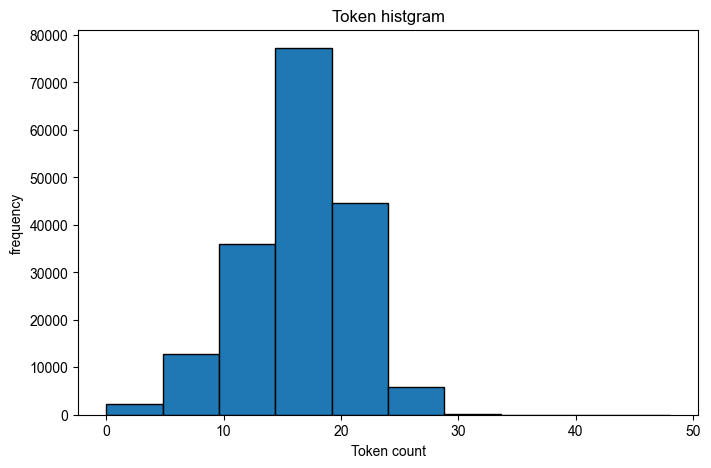

In [23]:
import matplotlib.pyplot as plt

# 查看 token 分布
print(df_cleaned[['text', 'token_count']])

# 指定 SimHei 字体（黑体），常见于 Windows 系统
plt.rcParams['font.sans-serif'] = ['Arial']  # 用黑体显示
plt.rcParams['axes.unicode_minus'] = False  # 解决负号显示问题
# 绘制 tokens 分布的直方图
plt.figure(figsize=(8, 5))
plt.hist(df_cleaned['token_count'], bins=10, edgecolor='black')
plt.title('Token histgram')
plt.xlabel('Token count')
plt.ylabel('frequency')
plt.show()

<font face="Arial" size="5" color="black">去除无关文本：</font>

In [24]:
# 需要自己看文本根据keyword删除无关文本

<font face="Arial" size="5" color="black">进行各种NLP任务之前的预处理：</font>

In [25]:
# 去除停用词
# https://github.com/igorbrigadir/stopwords
# 这个网站包含了大部分英文文本常用的停用词列表

In [26]:
# 读取停用词文件
with open('scikitlearn.txt', 'r') as file:
    stopwords = file.read().splitlines()

In [27]:
print(stopwords[:10])  # 查看前10个停用词

['a', 'about', 'above', 'across', 'after', 'afterwards', 'again', 'against', 'all', 'almost']


In [28]:
# 定义一个函数来移除停用词
def remove_stopwords(text):
    return ' '.join([word for word in text.split() if word.lower() not in stopwords])

In [29]:
# 应用函数到数据集的 text 列
df_cleaned_final_1 = df_cleaned_final.copy()
df_cleaned_final_1['cleaned_text'] = df_cleaned_final_1['text'].apply(remove_stopwords)

In [30]:
# 检测 text 列是否有空值
has_null = df_cleaned_final_1['cleaned_text'].isnull().any()  # 检查是否存在空值
print(f"是否存在空值: {has_null}")

是否存在空值: False


In [31]:
# 检测是否有只包含空格的行
only_spaces_1 = df_cleaned_final_1['cleaned_text'].apply(lambda x: isinstance(x, str) and x.strip() == '')

# 检查是否存在这样的行
has_only_spaces_1 = only_spaces_1.any()
print(f"是否存在只包含空格的行: {has_only_spaces_1}")

是否存在只包含空格的行: True


In [32]:
# 删除仅包含空格或为空的行
df_cleaned_final_1 = df_cleaned_final_1[~df_cleaned_final_1['cleaned_text'].apply(lambda x: isinstance(x, str) and x.strip() == '')]

In [33]:
# 检测是否有只包含空格的行
only_spaces_1 = df_cleaned_final_1['cleaned_text'].apply(lambda x: isinstance(x, str) and x.strip() == '')

# 检查是否存在这样的行
has_only_spaces_1 = only_spaces_1.any()
print(f"是否存在只包含空格的行: {has_only_spaces_1}")

是否存在只包含空格的行: False


In [34]:
df_cleaned_final_1.to_csv('covid19_tweets_cleaned_final.csv')